# Pylops - Convmtx

### Author: M.Ravasi

This notebook showcases the use of `pylops.utils.signalprocessing.convmtx` for two scenarios:
    
    - filter h is smaller than input signal
    - filter h is larger than input signal

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pylops

from scipy.signal import convolve, correlate, fftconvolve, oaconvolve
from pylops.basicoperators             import *
from pylops.signalprocessing           import *
from pylops.utils                      import dottest
from pylops.utils.wavelets             import *
from pylops.utils.signalprocessing     import convmtx

## Small filter

(33,)
(544, 512) (544, 512) (512, 512)
True True


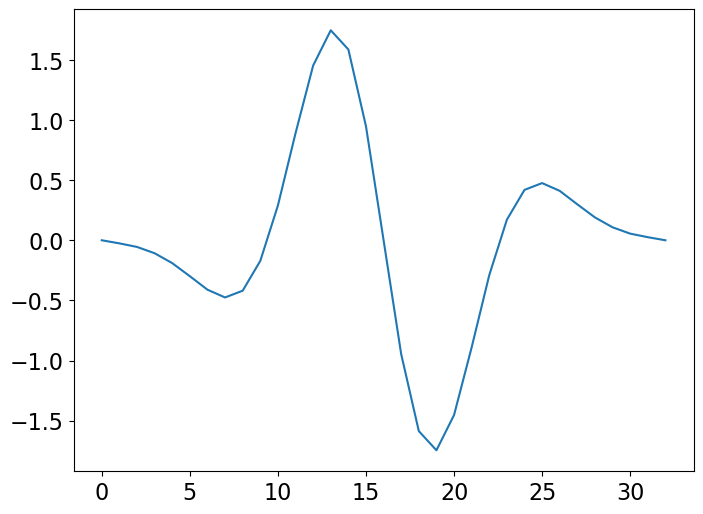

In [2]:
nh = 17
h, _, offset = ricker(np.arange(nh)*0.004, 15)
offset = offset+10
nh = len(h)
Fop = FirstDerivative(h.shape)
h = Fop @ h * 5
print(h.shape)

plt.plot(h)

n = 512
x = np.zeros(n)
x[n//2] = 1

H = convmtx(h, n, 0)
H1 = sp.linalg.convolution_matrix(h, n, mode='full')
H2 = Convolve1D(n, h, offset=0).todense()

print(H.shape, H1.shape, H2.shape)
print(np.allclose(H, H1), np.allclose(H[:n], H2))

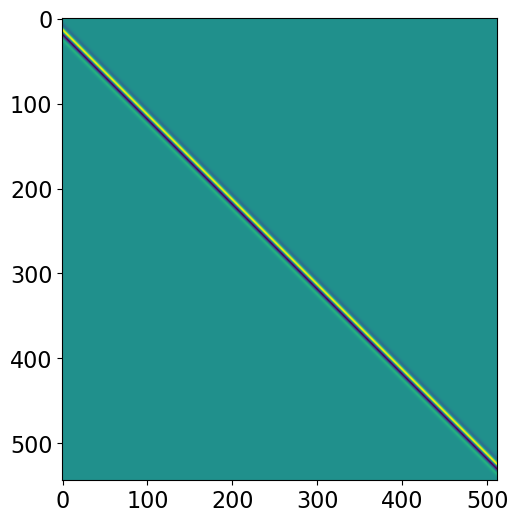

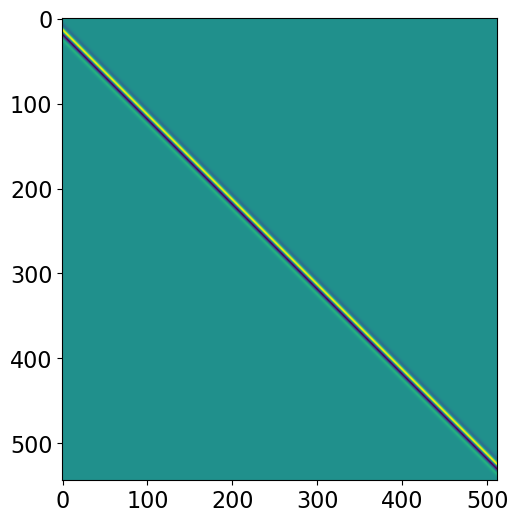

In [3]:
plt.figure()
plt.imshow(H)

plt.figure()
plt.imshow(H1)

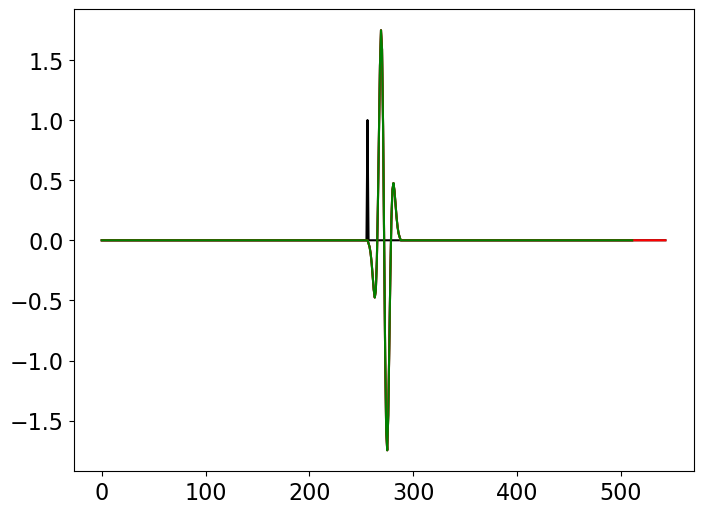

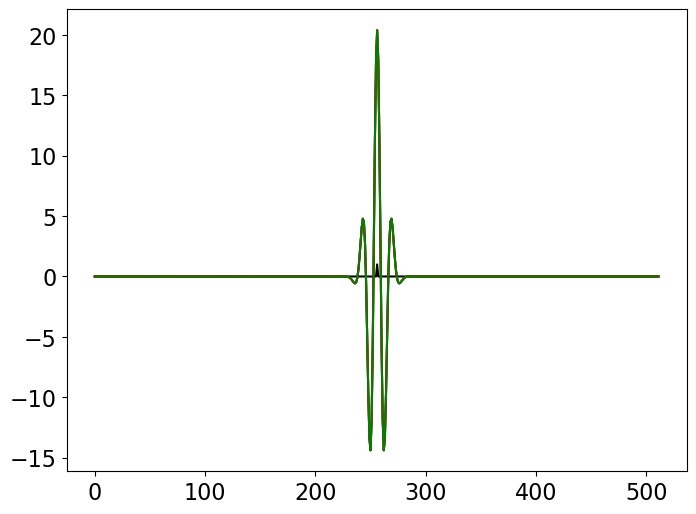

In [4]:
# Forw
y = H @ x 
y1 = H1 @ x 
y2 = H2 @ x 

plt.figure()
plt.plot(x, 'k')
plt.plot(y, 'k')
plt.plot(y1, 'r')
plt.plot(y2, 'g')

# Adj
xadj = H.T @ y
xadj1 = H1.T @ y 
xadj2 = H2.T @ y[:n]

plt.figure()
plt.plot(x, 'k')
plt.plot(xadj, 'k')
plt.plot(xadj1, 'r')
plt.plot(xadj2, 'g');

In [5]:
for offset in range(0, nh):
    H = convmtx(h, n, offset)
    H2 = Convolve1D(n, h, offset=offset).todense()

    #print(H.shape, H2.shape)
    assert np.allclose(H[:n], H2) 
    
    assert np.allclose(H[:n] @ x, H2 @ x ) 
    assert np.allclose(H[:n].T @ np.ones(n), H2.T @ np.ones(n) ) 

    """
    # Forw
    y = H @ x 
    y2 = H2 @ x 

    plt.figure()
    plt.plot(x, 'k')
    plt.plot(y, 'k')
    plt.plot(y2, 'g')
    """

## Large filter

(33,)
(544, 33) (544, 33) (512, 33)
True True


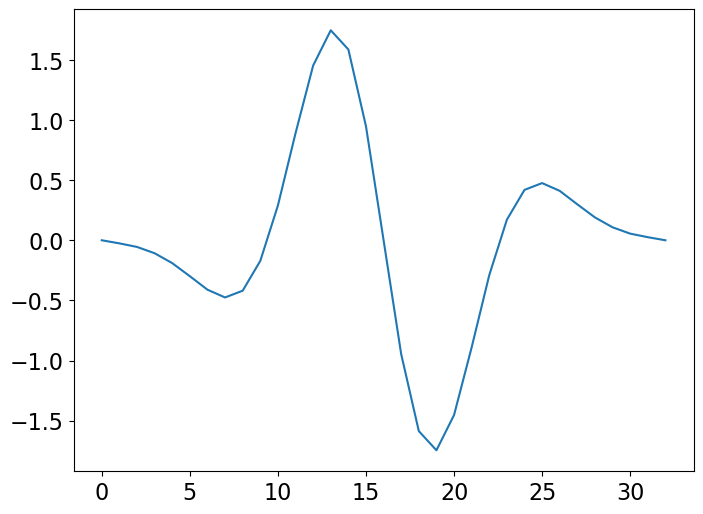

In [6]:
nh = 17
h, _, offset = ricker(np.arange(nh)*0.004, 15)
offset = offset+10
nh = len(h)
Fop = FirstDerivative(h.shape)
h = Fop @ h * 5
print(h.shape)

plt.plot(h)

n = 512
x = np.zeros(n)
x[n//2] = 1

X = convmtx(x, len(h), 0)
X1 = sp.linalg.convolution_matrix(x, len(h), mode='full')
X2 = Convolve1D(len(h), x, offset=0).todense()

print(X.shape, X1.shape, X2.shape)
print(np.allclose(X, X1), np.allclose(X[:n], X2))

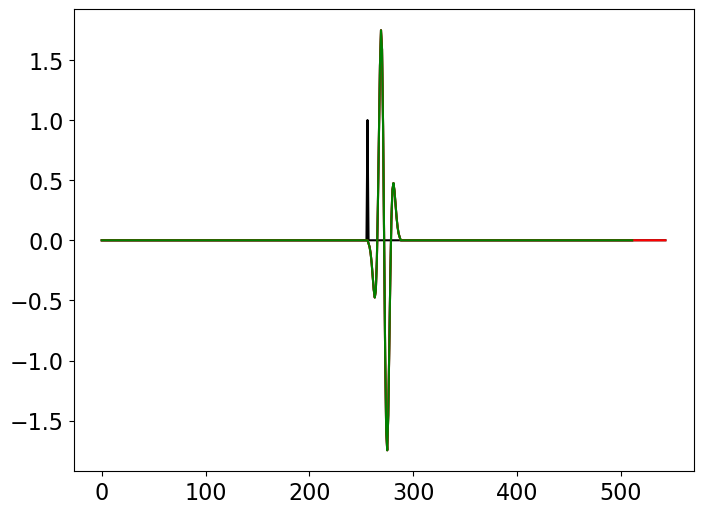

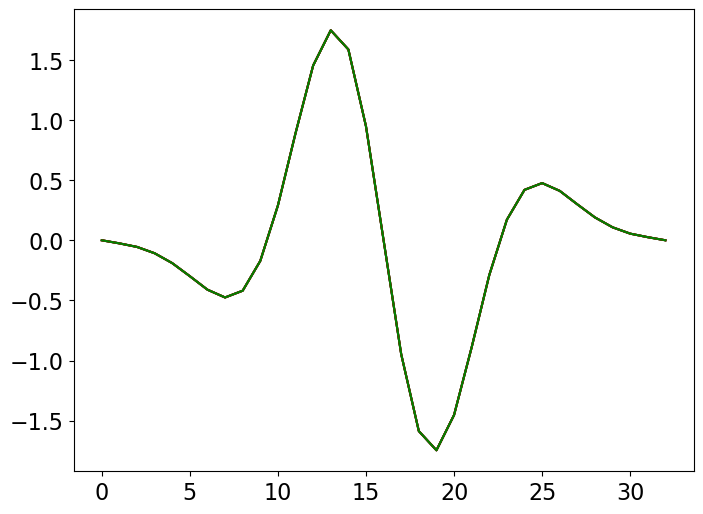

In [7]:
# Forw
y = X @ h
y1 = X1 @ h 
y2 = X2 @ h 

plt.figure()
plt.plot(x, 'k')
plt.plot(y, 'k')
plt.plot(y1, 'r')
plt.plot(y2, 'g')

# Adj
hadj = X.T @ y
hadj1 = X1.T @ y 
hadj2 = X2.T @ y[:n]

plt.figure()
plt.plot(h, 'k')
plt.plot(hadj, 'k')
plt.plot(hadj1, 'r')
plt.plot(hadj2, 'g');

In [8]:
for offset in range(0, nh):
    X = convmtx(x, len(h), 0)
    X2 = Convolve1D(len(h), x, offset=0).todense()

    #print(H.shape, H2.shape)
    assert np.allclose(X[:n], X2)
    
    assert np.allclose(X[:n] @ h, X2 @ h ) 
    assert np.allclose(X[:n].T @ np.ones(n), X2.T @ np.ones(n)) 

    """
    # Forw
    y = H @ x 
    y2 = H2 @ x 

    plt.figure()
    plt.plot(x, 'k')
    plt.plot(y, 'k')
    plt.plot(y2, 'g')
    """

## Checking convmtx = sp.linalg.convolution_matrix with off > 0

(33,)
(544, 33) (544, 33) (512, 33)
True True


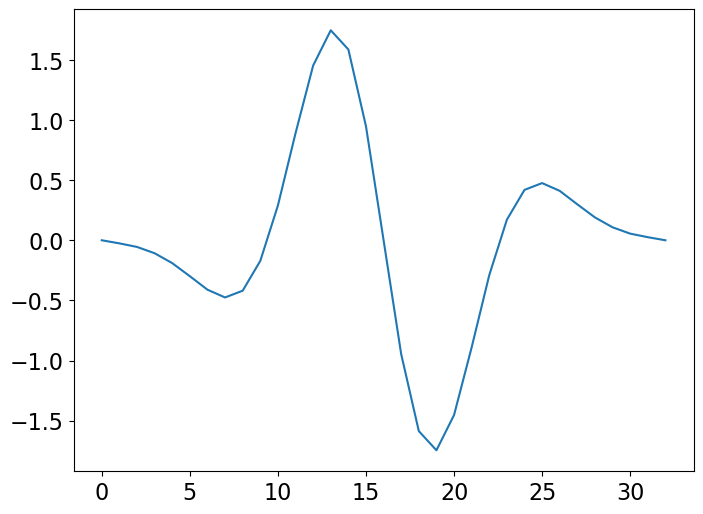

In [9]:
# Odd filter size
nh = 17
h, _, offset = ricker(np.arange(nh)*0.004, 15)
offset = offset+10
nh = len(h)
Fop = FirstDerivative(h.shape)
h = Fop @ h * 5
print(h.shape)

plt.plot(h)

x = np.zeros(n)
x[n//2] = 1

off = 11
X = convmtx(x, len(h), off)
X1 = sp.linalg.convolution_matrix(x, len(h), mode='full')
X2 = Convolve1D(len(h), x, offset=off).todense()

print(X.shape, X1.shape, X2.shape)
print(np.allclose(X[:-off], X1[off:]), np.allclose(X[:n], X2))

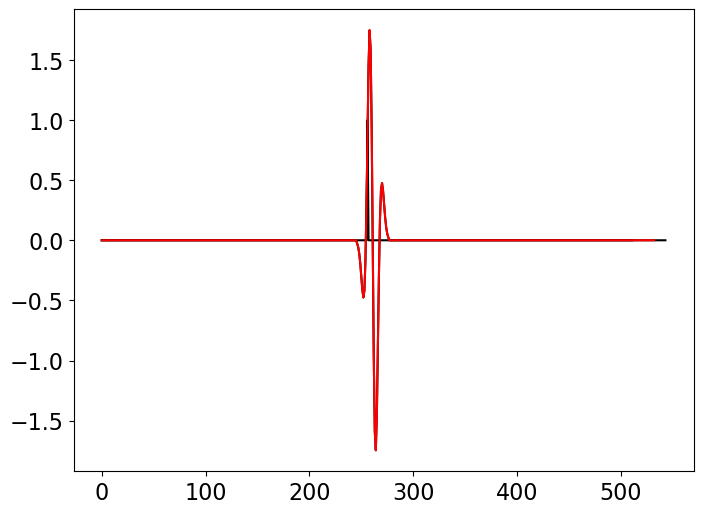

In [10]:
# Forw
y = X @ h
y1 = X1[off:] @ h 

plt.figure()
plt.plot(x, 'k')
plt.plot(y, 'k')
plt.plot(y1, 'r')

(33,)
(544, 512) (512, 512) (512, 512)
True True


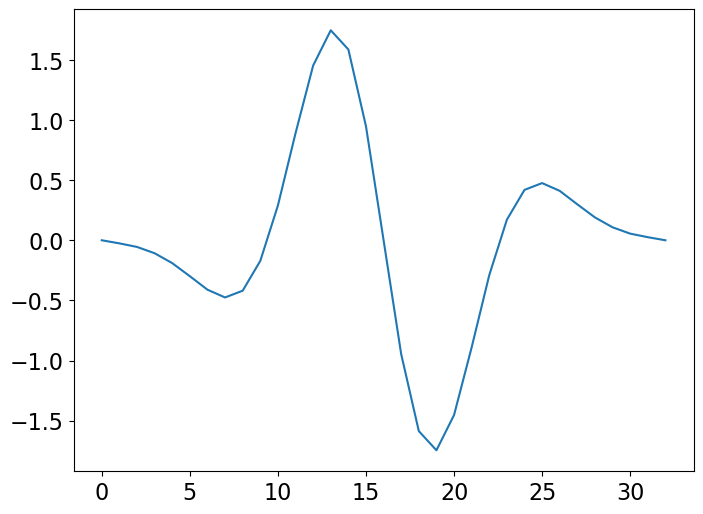

In [12]:
# Even filter size
nh = 18
h, _, offset = ricker(np.arange(nh)*0.004, 15)
offset = offset+10
nh = len(h)
Fop = FirstDerivative(h.shape)
h = Fop @ h * 5
print(h.shape)

plt.plot(h)

n = 512
x = np.zeros(n)
x[n//2] = 1

H = convmtx(h, n, nh//2)
H1 = sp.linalg.convolution_matrix(h, n, mode='same')
H2 = Convolve1D(n, h, offset=nh//2).todense()

print(H.shape, H1.shape, H2.shape)
print(np.allclose(H[:n], H1), np.allclose(H[:n], H2))